# Loan Data from Prosper Exploration 
## by Kexin Yao

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#Load the dataset into a pandas dataframe 
loans=pd.read_csv('prosperLoanData.csv')

In [3]:
#Set the parameter to see more columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

In [4]:
#Check the dataset's shape
print(loans.shape)

(113937, 81)


In [5]:
#Check the data type 
print(loans.dtypes)

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [6]:
#Check the data 
loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [7]:
print(loans.isnull().sum())

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

There are few variables have large null value,and since we are just interested to investigate some of the features and focus on about a dozen variables, I will extract them out, create a subset of the dataframe and remove the nulls. 

In [8]:
#Creat a subset that contains the variables I want to investigate.
loans_subset=pd.DataFrame(loans,columns=['Term', 'LoanStatus', 'BorrowerRate', 'ProsperScore', 'ListingCategory (numeric)',
              'EstimatedReturn', 'BorrowerState','EmploymentStatus','IncomeRange',
              'LoanOriginationDate','LoanOriginalAmount','Recommendations'])

In [9]:
#Check the null value of the new subset
loans_subset.isnull().sum()

Term                             0
LoanStatus                       0
BorrowerRate                     0
ProsperScore                 29084
ListingCategory (numeric)        0
EstimatedReturn              29084
BorrowerState                 5515
EmploymentStatus              2255
IncomeRange                      0
LoanOriginationDate              0
LoanOriginalAmount               0
Recommendations                  0
dtype: int64

In [10]:
loans_subset.dropna(axis=0,how='any',inplace=True)

In [11]:
loans_subset.describe()

,Term,BorrowerRate,ProsperScore,ListingCategory (numeric),EstimatedReturn,LoanOriginalAmount,Recommendations
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000
mean,42.486135,0.196022,5.950067,3.312647,0.096068,9083.440515,0.017560
std,11.640346,0.074631,2.376501,4.364277,0.030403,6287.860058,0.187963
min,12.000000,0.040000,1.000000,0.000000,-0.182700,1000.000000,0.000000
25%,36.000000,0.135900,4.000000,1.000000,0.074080,4000.000000,0.000000
50%,36.000000,0.187500,6.000000,1.000000,0.091700,7500.000000,0.000000
75%,60.000000,0.257400,8.000000,3.000000,0.116600,13500.000000,0.000000
max,60.000000,0.360000,11.000000,20.000000,0.283700,35000.000000,19.000000


In [12]:
loans_subset.head()

,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),EstimatedReturn,BorrowerState,EmploymentStatus,IncomeRange,LoanOriginationDate,LoanOriginalAmount,Recommendations
1,36,Current,0.0920,7.0,2,0.05470,CO,Employed,"$50,000-74,999",2014-03-03 00:00:00,10000,0
3,36,Current,0.0974,9.0,16,0.06000,GA,Employed,"$25,000-49,999",2012-11-01 00:00:00,10000,0
4,36,Current,0.2085,4.0,2,0.09066,MN,Employed,"$100,000+",2013-09-20 00:00:00,15000,0
5,60,Current,0.1314,10.0,1,0.07077,NM,Employed,"$100,000+",2013-12-24 00:00:00,15000,0
6,36,Current,0.2712,2.0,1,0.11070,KS,Employed,"$25,000-49,999",2013-04-18 00:00:00,3000,0


In [13]:
loans_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Term                       84853 non-null  int64  
 1   LoanStatus                 84853 non-null  object 
 2   BorrowerRate               84853 non-null  float64
 3   ProsperScore               84853 non-null  float64
 4   ListingCategory (numeric)  84853 non-null  int64  
 5   EstimatedReturn            84853 non-null  float64
 6   BorrowerState              84853 non-null  object 
 7   EmploymentStatus           84853 non-null  object 
 8   IncomeRange                84853 non-null  object 
 9   LoanOriginationDate        84853 non-null  object 
 10  LoanOriginalAmount         84853 non-null  int64  
 11  Recommendations            84853 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 8.4+ MB


In [14]:
loans_subset.nunique()

Term                            3
LoanStatus                     11
BorrowerRate                 1229
ProsperScore                   11
ListingCategory (numeric)      20
EstimatedReturn              1476
BorrowerState                  48
EmploymentStatus                7
IncomeRange                     7
LoanOriginationDate          1165
LoanOriginalAmount           1934
Recommendations                 9
dtype: int64

In [15]:
print('Term:',"\n",loans_subset.Term.unique())
print('LaonStatus:',"\n",loans_subset.LoanStatus.unique())
print('ProsperScore:',"\n",loans_subset.ProsperScore.unique())
print('ListingCategory (numeric):',"\n",loans_subset['ListingCategory (numeric)'].unique())
print('BorrowerState:',"\n",loans_subset.BorrowerState.unique())
print('EmploymentStatus:',"\n",loans_subset.EmploymentStatus.unique())
print('IncomeRange:',"\n",loans_subset.IncomeRange.unique())
print('Recommendations',"\n",loans_subset.Recommendations.unique())

Term: 
 [36 60 12]
LaonStatus: 
 ['Current' 'Past Due (1-15 days)' 'Defaulted' 'Completed' 'Chargedoff'
 'Past Due (16-30 days)' 'Past Due (61-90 days)' 'Past Due (31-60 days)'
 'Past Due (91-120 days)' 'FinalPaymentInProgress' 'Past Due (>120 days)']
ProsperScore: 
 [ 7.  9.  4. 10.  2. 11.  8.  5.  3.  6.  1.]
ListingCategory (numeric): 
 [ 2 16  1  7 13  6 15 20 19 18  3  8 11 14  9 17 10  0  5 12]
BorrowerState: 
 ['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'MI' 'NV' 'NJ' 'TX' 'AR' 'SC' 'DE' 'UT'
 'DC' 'MA' 'MO' 'CT' 'IN' 'KY' 'OK' 'MS' 'WV' 'RI' 'TN' 'ID' 'HI' 'NH'
 'NE' 'WY' 'AK' 'MT' 'VT' 'SD']
EmploymentStatus: 
 ['Employed' 'Other' 'Full-time' 'Self-employed' 'Not employed' 'Retired'
 'Part-time']
IncomeRange: 
 ['$50,000-74,999' '$25,000-49,999' '$100,000+' '$75,000-99,999'
 '$1-24,999' 'Not employed' '$0']
Recommendations 
 [ 0  1  2  3  5  4 19  9 18]


In [16]:
#Change the ListingCategory(numeric) to ListingCategory and change the number to category name 
loans_subset.rename(columns={'ListingCategory (numeric)':'ListingCategory'},inplace=True)
loans_subset['ListingCategory'].replace({0:"Not Avaliable",1:"Debet Consolidation",2:"Home Improvement",3:"Business",4:"Personal Loan",5:"Student Use",6:"Auto",7:"Other",8:"Baby&Adoption",9:"Boat",10:"Cosmetic Procedure",11:"Engagement Ring",12:"Green Loans",13:"Household Expenses",14:"Large Purchases",15:"Medical/Dental",16:"Motorcycle",17:"RV",18:"Taxes",19:"Vacation",20:"Wedding Loans"},inplace=True)
loans_subset.head()

,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory,EstimatedReturn,BorrowerState,EmploymentStatus,IncomeRange,LoanOriginationDate,LoanOriginalAmount,Recommendations
1,36,Current,0.0920,7.0,Home Improvement,0.05470,CO,Employed,"$50,000-74,999",2014-03-03 00:00:00,10000,0
3,36,Current,0.0974,9.0,Motorcycle,0.06000,GA,Employed,"$25,000-49,999",2012-11-01 00:00:00,10000,0
4,36,Current,0.2085,4.0,Home Improvement,0.09066,MN,Employed,"$100,000+",2013-09-20 00:00:00,15000,0
5,60,Current,0.1314,10.0,Debet Consolidation,0.07077,NM,Employed,"$100,000+",2013-12-24 00:00:00,15000,0
6,36,Current,0.2712,2.0,Debet Consolidation,0.11070,KS,Employed,"$25,000-49,999",2013-04-18 00:00:00,3000,0


In [17]:
#Change the category variables to category type
loans_subset['LoanStatus']=loans_subset['LoanStatus'].astype('category')
loans_subset['ListingCategory']=loans_subset['ListingCategory'].astype('category')
loans_subset['BorrowerState']=loans_subset['BorrowerState'].astype('category')
loans_subset['EmploymentStatus']=loans_subset['EmploymentStatus'].astype('category')

In [18]:
#Convert the Term,LoanStatus,ProsperScore,IncomeRange and Recommendations into ordered categorical types
ordinal_var_dict = {'Term': [12,36,60],
                    'ProsperScore': [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.],
                    'IncomeRange': ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                    'Recommendations':[ 0,1,2,3,4,5,9,18,19]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans_subset[var] = loans_subset[var].astype(ordered_var)

In [19]:
#Convert the LoanOriginationDate to datetime type
loans_subset['LoanOriginationDate']=pd.to_datetime(loans_subset['LoanOriginationDate'])

In [20]:
loans_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Term                 84853 non-null  category      
 1   LoanStatus           84853 non-null  category      
 2   BorrowerRate         84853 non-null  float64       
 3   ProsperScore         84853 non-null  category      
 4   ListingCategory      84853 non-null  category      
 5   EstimatedReturn      84853 non-null  float64       
 6   BorrowerState        84853 non-null  category      
 7   EmploymentStatus     84853 non-null  category      
 8   IncomeRange          84853 non-null  category      
 9   LoanOriginationDate  84853 non-null  datetime64[ns]
 10  LoanOriginalAmount   84853 non-null  int64         
 11  Recommendations      84853 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(2), int64(1)
memory usage: 3.9 MB


In [21]:
loans_subset.to_csv('loans_subset.csv')

### What is the structure of your dataset?

>There are 113937 loans in the dataset with 81 features.Each loan contains the information on the borrowered's background information and details regarding the loans.This analysis will focus on 12 variables listed below:

**Term:** The lenggth of the loan expressed in months (category) 

**LoanStatus:** The current status of the loan    (category)       

**BorrowerRate:** The Borrower's interest rate for this loan             

**ProsperScore:** A custom risk score built using historical Prosper data.(category)      

**ListingCategory:** The category of the listing that the borrower selected when posting their listing. (category)      

**EstimatedReturn:** The estimated return assigned to the listing at the time it was created.       

**BorrowerState:** The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.(category)  

**EmploymentStatus:** The employment status of the borrower at the time they posted the listing.(category)      

**IncomeRange:** The income range of the borrower at the time the listing was created.(category)      

**LoanOriginationDate:** The date the loan was originated. 

**LoanOriginalAmount:** The origination amount of the loan.               

**Recommendations:** Number of recommendations the borrower had at the time the listing was created.(category)      
### What is/are the main feature(s) of interest in your dataset?

>The main feature of interest in the dataset is LoanOriginalAmount,this analysis will focus on figureing out which features will influence the LoanOriginalAmount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>The variables listed in the previous section include the detail of the Borrwer's and loan's information. 

## Univariate Exploration

> In this section, I'll start by looking at the distribution of the main variable of interest:LoanOriginalAmount.

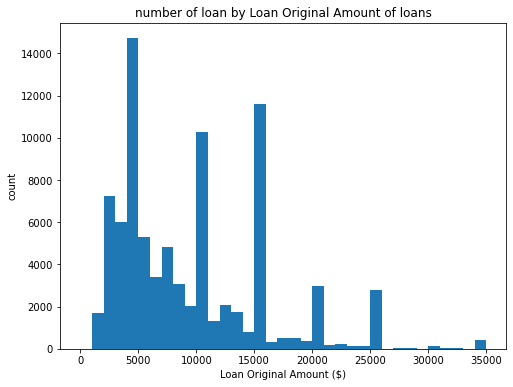

In [22]:
#start with a looking the distribution of the mian variable interest:LoanOriginalAmount
plt.figure(figsize=[8,6])
default_color = sb.color_palette()[0]
plt.title('number of loan by Loan Original Amount of loans')
binsize=1000
bins = np.arange(0, loans_subset['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data =loans_subset,x = 'LoanOriginalAmount', bins = bins,color=default_color)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

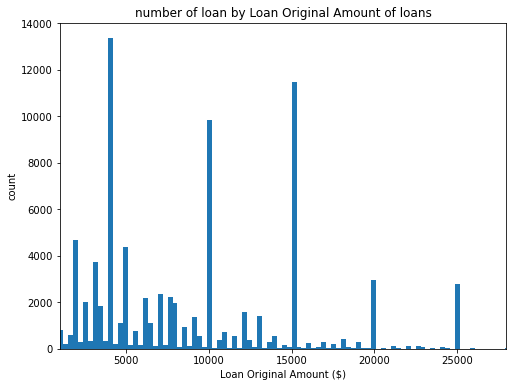

In [23]:
# investigating further on an smaller bin size
plt.figure(figsize=[8,6])
default_color = sb.color_palette()[0]
plt.title('number of loan by Loan Original Amount of loans')
binsize=300
bins = np.arange(0, loans_subset['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data =loans_subset,x = 'LoanOriginalAmount', bins = bins,color=default_color)
plt.xlim([1000,28000])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

The Original amount of loan,from the small binsize it can see clearly,There are very large spikes in frequency at the bars with 5000, (e.g.5000,10000,15000); frequency quickly trails off until the next spike. These probably represent standard loan amount for use specify listing category.

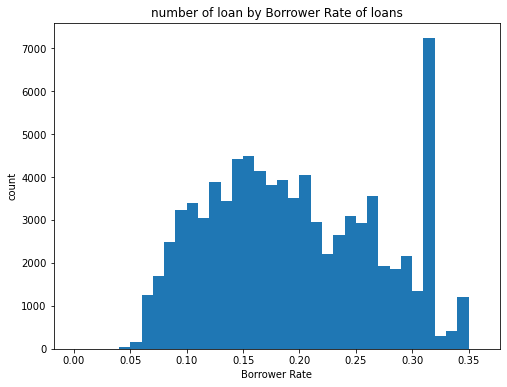

In [24]:
#Investigate the distribution of the Borrower Rate
plt.figure(figsize=[8,6])
default_color = sb.color_palette()[0]
plt.title('number of loan by Borrower Rate of loans')
binsize=0.01
bins = np.arange(0, loans_subset['BorrowerRate'].max()+binsize, binsize)
plt.hist(data =loans_subset,x = 'BorrowerRate', bins = bins,color=default_color)
plt.xlabel('Borrower Rate')
plt.ylabel('count')
plt.show()


The distribution of Borrower rate seems to be normal distribution except the outlier around 0.32. 

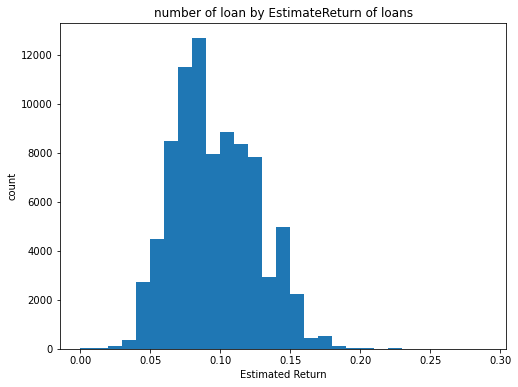

In [25]:
#Let's start the EstimatedReturn
plt.figure(figsize=[8,6])
default_color = sb.color_palette()[0]
plt.title('number of loan by EstimateReturn of loans')
binsize=0.01
bins = np.arange(0, loans_subset['EstimatedReturn'].max()+binsize, binsize)
plt.hist(data =loans_subset,x = 'EstimatedReturn', bins = bins,color=default_color)
plt.xlabel('Estimated Return')
plt.ylabel('count')
plt.show()

The distribution of the estimated return seems to be a normal distribution that the highist and lowest estimated return are the least common,and the average around 0.1 being the most common.

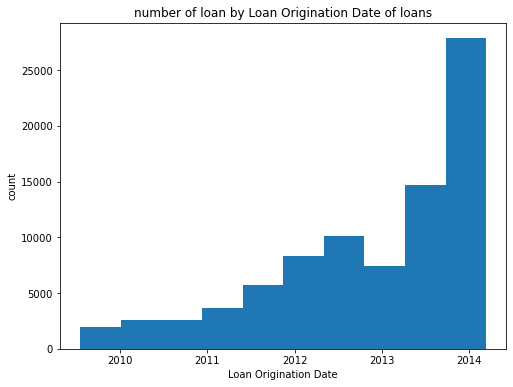

In [26]:
#Now is about the LoanOriginationDate
plt.figure(figsize=[8,6])
default_color = sb.color_palette()[0]
plt.title('number of loan by Loan Origination Date of loans')
plt.hist(data =loans_subset,x = 'LoanOriginationDate',color=default_color)
plt.xlabel('Loan Origination Date')
plt.ylabel('count')
plt.show()

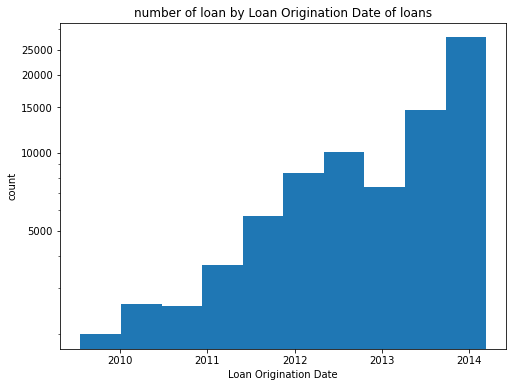

In [27]:
# there's a long tail in the distribution, so let's put it on a log scale instead
plt.figure(figsize=[8,6])
default_color = sb.color_palette()[0]
plt.title('number of loan by Loan Origination Date of loans')
plt.hist(data =loans_subset,x = 'LoanOriginationDate',color=default_color)
plt.yscale('log')
plt.yticks([5000, 1e4, 1.5e4, 2e4, 2.5e4,], [5000, 10000, 15000, 20000, 25000,])
plt.xlabel('Loan Origination Date')
plt.ylabel('count')
plt.show()

Loan origination date has a long-tailed distribution,with a lots of loans on the 2014,and few on the 2010. When plotted on a log-scale,the nummber of loans seems to be exponential grow from year to year. 

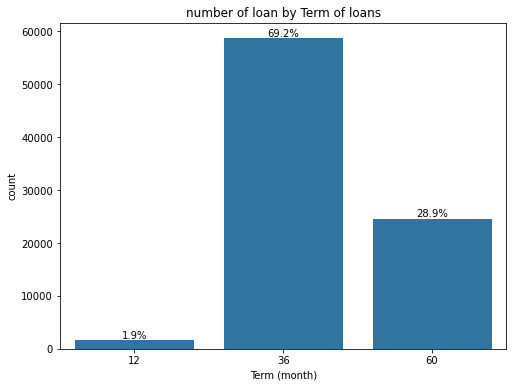

In [28]:
#Now investigate the category variables,first is the Term
plt.figure(figsize=[8,6])
ax=sb.countplot(data = loans_subset, x = 'Term', color = default_color,)
plt.title('number of loan by Term of loans')
plt.xlabel('Term (month)')
plt.ylabel('count')
ncount=len(loans_subset)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

The most common loan term is 36 month, and next is 60 month, the count of the term of 12 month is the least. 

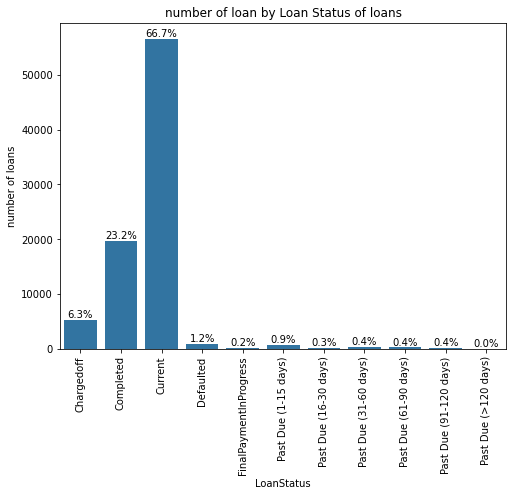

In [29]:
#Let's start with the LoanStatus
plt.figure(figsize=[8,6])
ax=sb.countplot(data = loans_subset, x = 'LoanStatus', color = default_color,)
plt.title('number of loan by Loan Status of loans')
plt.xlabel('LoanStatus')
plt.ylabel('number of loans')
plt.xticks(rotation=90)
ncount=len(loans_subset)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

Most of the loans in the dataset are actually Current loans. Following it with a big frequency the Completed loans, followed by Chargedoff, while Defaulted,FinalPaymentInProgress and  Past due categories loans represent a minority. 

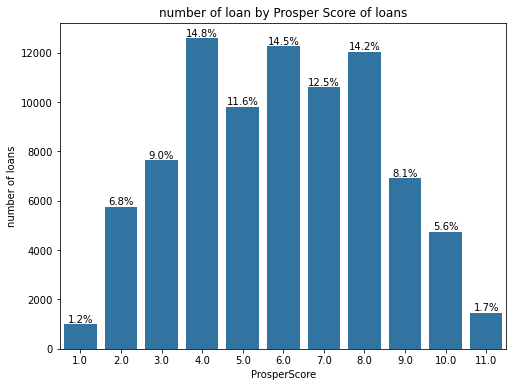

In [30]:
#Next category variable is ProsperScore
plt.figure(figsize=[8,6])
ax=sb.countplot(data = loans_subset, x = 'ProsperScore', color =default_color,)
plt.title('number of loan by Prosper Score of loans')
plt.xlabel('ProsperScore')
plt.ylabel('number of loans')
ncount=len(loans_subset)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

The distribution of Prosper score seems to be normal distribution.Since it is a custom risk score, so the highest risk and lowest risk is the least common, the median risk is the most common.

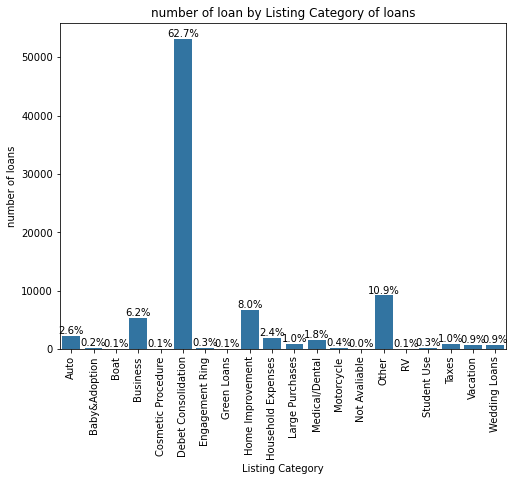

In [31]:
#The next variable is ListingCategory:
plt.figure(figsize=[8,6])
ax=sb.countplot(data = loans_subset, x = 'ListingCategory', color =default_color,)
plt.title('number of loan by Listing Category of loans')
plt.xticks(rotation=90)
plt.xlabel('Listing Category')
plt.ylabel('number of loans')
ncount=len(loans_subset)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

The vast majority of loans are used for debt consolidation. Other notable categories include Other, Home Improvement and Business. 

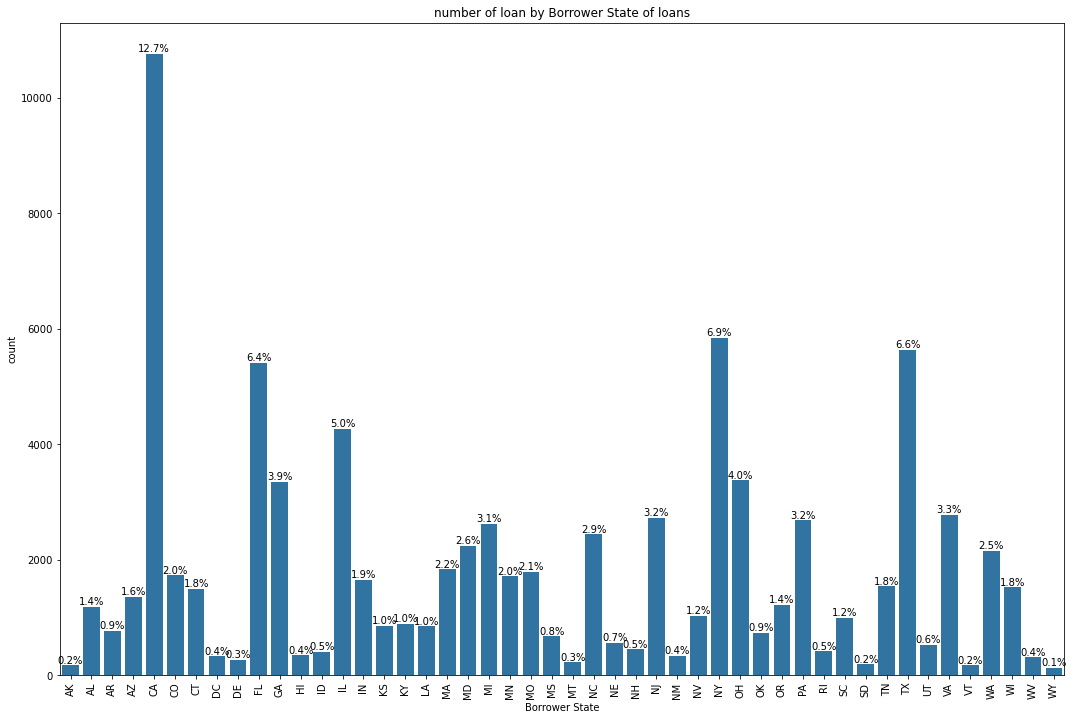

In [32]:
#This time for BorrowerState variable:
plt.figure(figsize=[18,12])
ax=sb.countplot(data = loans_subset, x = 'BorrowerState', color = default_color,)
plt.title('number of loan by Borrower State of loans')
plt.xticks(rotation=90)
plt.xlabel('Borrower State')
plt.ylabel('count')
ncount=len(loans_subset)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

The vast majority of loans are borrowered in California,Other notable regions include Florida,NewYork and Texas.

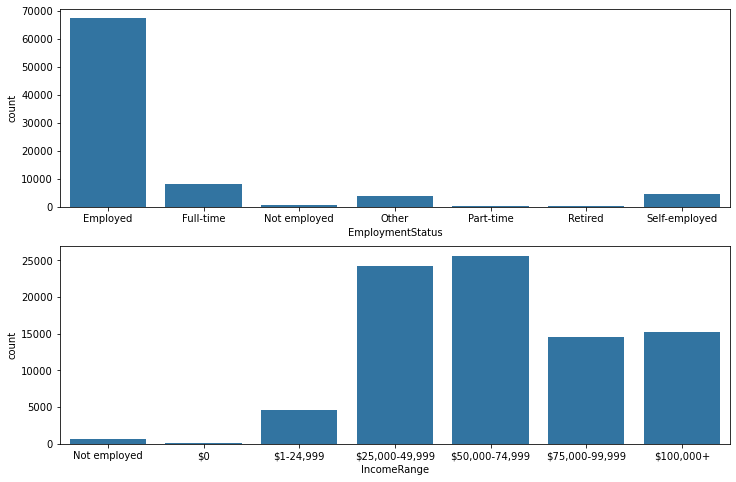

In [33]:
#The EmploymentStatus and IncomeRange I will put together 
fig, ax = plt.subplots(nrows=2, figsize = [12,8])
default_color = sb.color_palette()[0]
sb.countplot(data =loans_subset, x = 'EmploymentStatus', color = default_color, ax = ax[0])
sb.countplot(data =loans_subset, x = 'IncomeRange', color = default_color, ax = ax[1])
plt.show()

The most borrower's status is employeed and the next is full-time.About the income range, its a roughly normal distribution.But the higher income range obviously have more counts of loans than the lower income range.

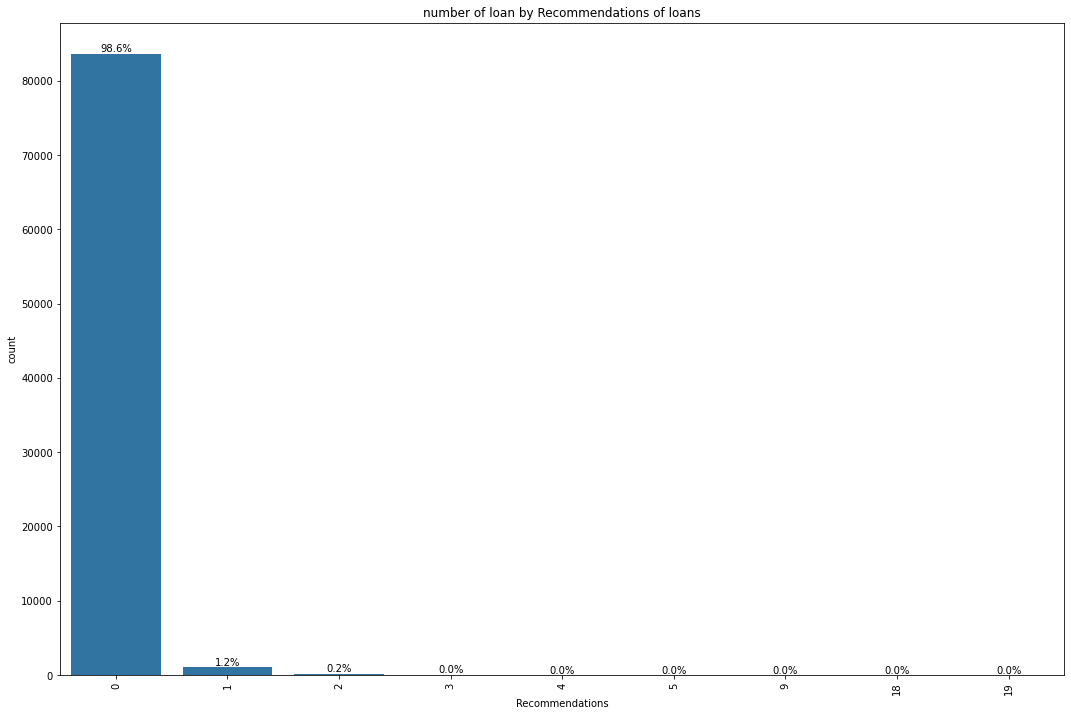

In [34]:
#The last one is Recommendations
plt.figure(figsize=[18,12])
ax=sb.countplot(data = loans_subset, x = 'Recommendations', color = default_color,)
plt.title('number of loan by Recommendations of loans')
plt.xticks(rotation=90)
plt.xlabel('Recommendations')
plt.ylabel('count')
ncount=len(loans_subset)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') 

Most loans are belong to the borrowers which have no recommendations at the time the listing was created, and just a few have one recommendation.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My interest variable is the Original amount of loan,There are few large spikes at the bars.So I investigate further in a smaller bin size,I find that the spikes in frequency at the bars with 5000(e.g.5000,10000,15000), These probably represent standard loan amount for use specify listing category.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>For the feature of LoanOriginationDate,it has a long-tailed distribution,with a lots of loans on the 2014,and few on the 2010. I perfomed it with transform the count into a log-scale,Because the nummber of loans seems to be exponential grow from year to year.

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data.

In [35]:
num_vars = ['BorrowerRate', 'EstimatedReturn','LoanOriginationDate','LoanOriginalAmount']
cat_vars = ['Term','LoanStatus','ProsperScore','ListingCategory','BorrowerState','EmploymentStatus','IncomeRange', 'Recommendations']

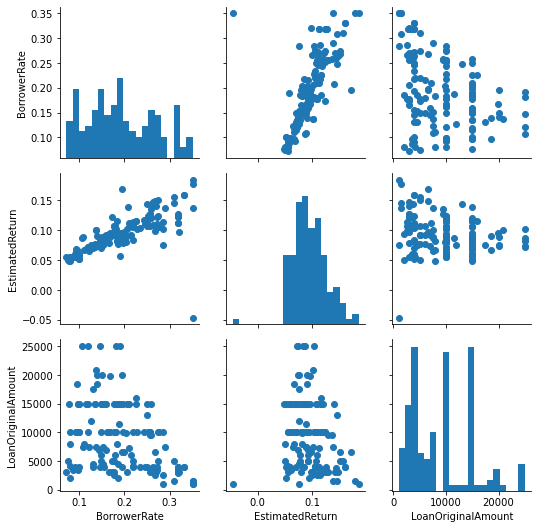

In [36]:
# plot matrix of the numeric variables 
numeric_vars = ['BorrowerRate', 'EstimatedReturn','LoanOriginalAmount']
samples = np.random.choice(loans_subset.shape[0], 200, replace = False)
loans_subset_samp =loans_subset.loc[loans_subset.index.intersection(samples),:]

g = sb.PairGrid(data = loans_subset_samp, vars = numeric_vars,)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

There are strong positive relationships between Estimated Return and Borrow rate.It is make sense because higher borrower rate usually will have higher estimated return.


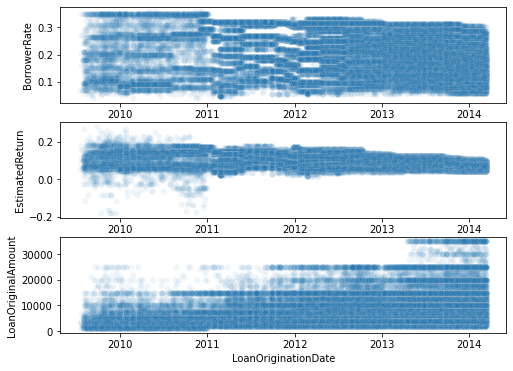

In [37]:
#This time I will findout the relationship between these three numeric varibles and time
plt.figure(figsize = [8,6])

# subplot 1: Loan Origination Date vs. Borrower Rate
ax = plt.subplot(3, 1, 1)
sb.scatterplot(data =loans_subset, x = 'LoanOriginationDate', y = 'BorrowerRate', color=default_color,alpha=1/15)

# subplot 2: Loan Origination Date vs. EstimatedReturn
ax = plt.subplot(3, 1, 2)
sb.scatterplot(data = loans_subset, x = 'LoanOriginationDate',y='EstimatedReturn',color=default_color,alpha=1/15)

# subplot 3: Loan Origination Data vs. Loan Original Amount 
ax = plt.subplot(3, 1, 3)
sb.scatterplot(data = loans_subset, x = 'LoanOriginationDate', y='LoanOriginalAmount',color=default_color,alpha=1/15)

plt.show()

As We can see, form the time move on, the estimated return and borrower rate didn't changed a lot, but the number of loans seems to be more in 2014 than 2010.Form year to year, the Loan Original amount has increased.

<Figure size 1080x1800 with 0 Axes>

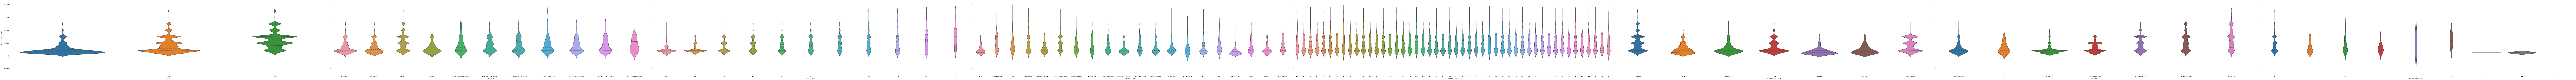

In [38]:
#Now look at relationships between the eight categorical features
# plot all categorical variables with the violinplot against and LoanOriginalAmount to see the relationship 
plt.figure(figsize = [15,25])
g=sb.PairGrid(data =loans_subset, y_vars='LoanOriginalAmount'
              ,x_vars=cat_vars,height=8, aspect=4)
g.map(sb.violinplot,inner='quartile');


The plot of the full data using a violin plot provide lots information. It is highly suggested that the increase of loan original amout across increasing term.It also clear that the loan original amount is increse with the prosper score. And the loan original amount increse with the increse of the income range.

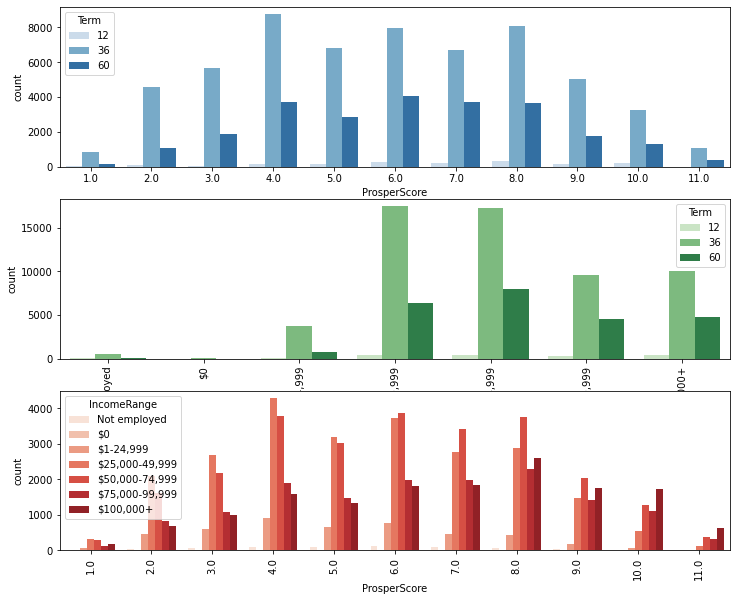

In [39]:
#Now look at relationships between the Three categorical features
# Since Previous we find that the three variables are related to LoanOriginalAmount
plt.figure(figsize = [12,10])

# subplot 1: Term vs.ProsperScore
ax = plt.subplot(3, 1, 1)
sb.countplot(data =loans_subset, x = 'ProsperScore', hue = 'Term', palette = 'Blues')

# subplot 2: Term vs. IncomeRange
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loans_subset, x = 'IncomeRange', hue = 'Term', palette = 'Greens')
plt.xticks(rotation=90)
# subplot 3: IncomeRange vs. Prosperscore
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loans_subset, x = 'ProsperScore', hue ='IncomeRange', palette = 'Reds')
plt.xticks(rotation=90)
plt.show()

There doesn't seem to be that much interaction between the prosper score and term, but  it seems like there might be more higher ProsperScore loans on the higher income range. And the higher income range people prior to have longer term loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Loan Original Amount seems have no relationship with the borrower rate and Borrower returm.But the increase of loan original amout  across increasing term.And loan original amount is increse with the prosper score .And the loan original amount increse with the increse of the income range.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> And there might be more higher ProsperScore loans on the higher income range ($100,000+).

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the three categorical variable (Prosperscore,Term,Income range) play into the relationship between borrower rate and loan original amount

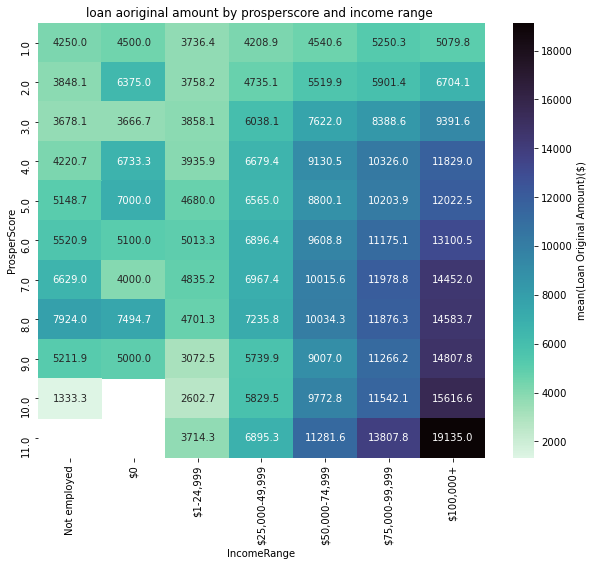

In [40]:
#plot the heatmap of prosperscore and income range with loan aoriginal amount
cat_means=loans_subset.groupby(['ProsperScore','IncomeRange']).mean()['LoanOriginalAmount']
cat_means=cat_means.reset_index(name="LoanOriginalAmount_avg")
cat_means=cat_means.pivot(index='ProsperScore',columns='IncomeRange',values='LoanOriginalAmount_avg')
plt.figure(figsize = [10,8])
plt.title('loan aoriginal amount by prosperscore and income range ');
sb.heatmap(cat_means,annot=True,fmt='.1f',cbar_kws={'label':'mean(Loan Original Amount)($)'},cmap="mako_r",);

As we can see, In general,the prosper score and income range increased, the Loan Original amount also increased, but for the Income range are not employed and $0, even with high prosper score, the loan original amount is 0.

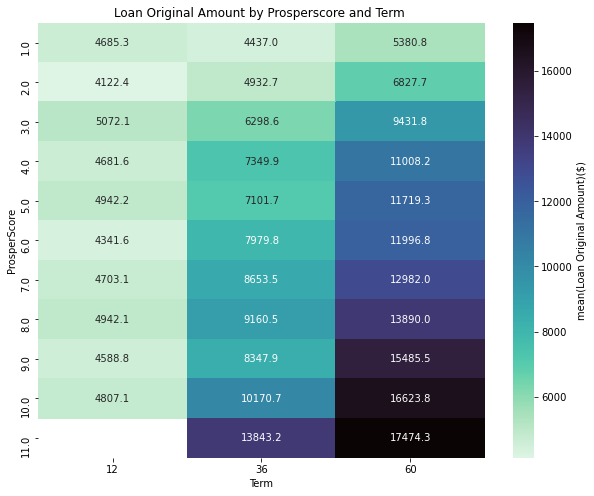

In [41]:
cat_means=loans_subset.groupby(['ProsperScore','Term']).mean()['LoanOriginalAmount']
cat_means=cat_means.reset_index(name="LoanOriginalAmount_avg")
cat_means=cat_means.pivot(index='ProsperScore',columns='Term',values='LoanOriginalAmount_avg')
plt.figure(figsize = [10,8])
plt.title('Loan Original Amount by Prosperscore and Term ');
plt.ylabel('Prosper Score')
plt.xlabel('Term (month)');
sb.heatmap(cat_means,annot=True,fmt='.1f',cbar_kws={'label':'mean(Loan Original Amount)($)'},cmap="mako_r");

With the term and prosper score increased, the loan original amount have increased. 

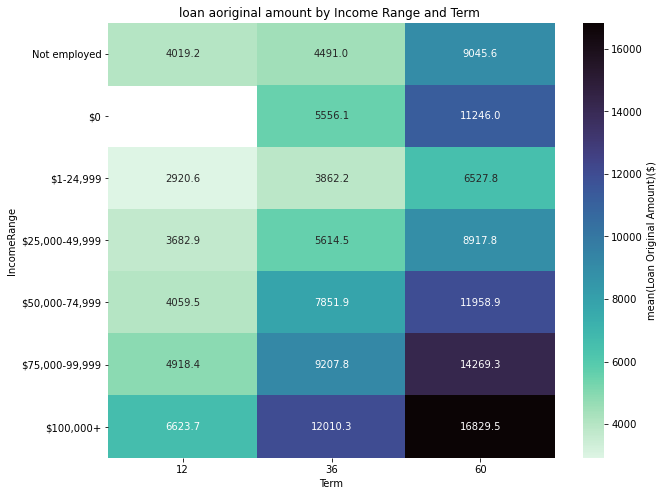

In [42]:
cat_means=loans_subset.groupby(['IncomeRange','Term']).mean()['LoanOriginalAmount']
cat_means=cat_means.reset_index(name="LoanOriginalAmount_avg")
cat_means=cat_means.pivot(index='IncomeRange',columns='Term',values='LoanOriginalAmount_avg')
plt.figure(figsize = [10,8])
plt.title('loan aoriginal amount by Income Range and Term ');
plt.ylabel('Prosper Score')
plt.xlabel('Term (month)');
sb.heatmap(cat_means,annot=True,fmt='.1f',cbar_kws={'label':'mean(Loan Original Amount)($)'},cmap="mako_r");

It is also obvious that the loan original amount is increased with the higher income range and longer term.

Next I will looking at the specific original amount loan.

In [43]:
#Select the  income range of approximately 5000
loans_subset_flag = (loans_subset['LoanOriginalAmount'] >=4000) & (loans_subset['LoanOriginalAmount'] <= 6000)
loans_subset_5000 = loans_subset.loc[loans_subset_flag,:]

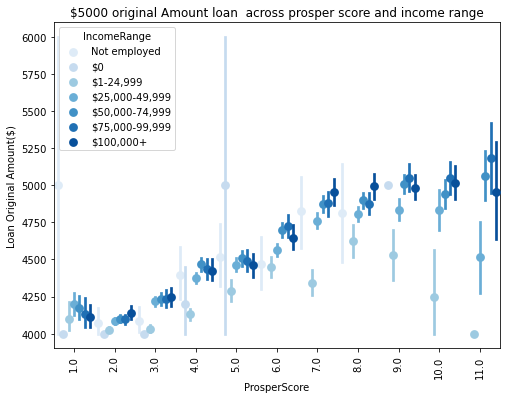

In [44]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans_subset_5000 , x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.8)
plt.title('$5000 original Amount loan  across prosper score and income range')
plt.ylabel('Loan Original Amount($)')
plt.xticks(rotation=90)
plt.show();


It is clearly that for the original amount around 5000, the prosper score is increased with the amount of the original loan. 

In [45]:
#Select the  income range of approximately 20000
loans_subset_flag = (loans_subset['LoanOriginalAmount'] >=19000) & (loans_subset['LoanOriginalAmount'] <= 21000)
loans_subset_20000 = loans_subset.loc[loans_subset_flag,:]

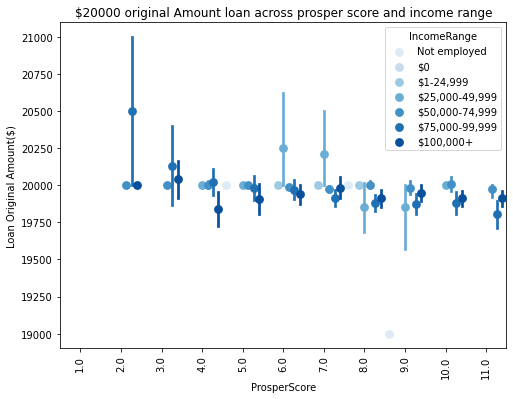

In [46]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans_subset_20000 , x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge =0.8)
plt.title('$20000 original Amount loan across prosper score and income range')
plt.ylabel('Loan Original Amount($)')
plt.xticks(rotation=90)
plt.show();

 for the original amount around 20000, the prosper score is decreased with the amount of the original loan.

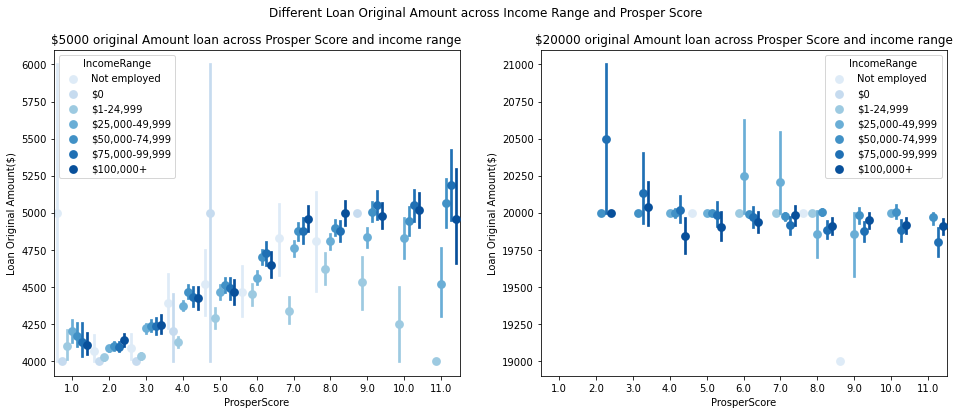

In [47]:
#Put The figures together to compare 
fig, ax = plt.subplots(ncols = 2, figsize = [16,6])
plt.suptitle('Different Loan Original Amount across Income Range and Prosper Score')
sb.pointplot(data = loans_subset_5000 , x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.8, ax = ax[0])
ax[0].set_title('$5000 original Amount loan across Prosper Score and income range')
ax[0].set_ylabel('Loan Original Amount($)')


sb.pointplot(data = loans_subset_20000 , x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge =0.8,ax = ax[1])
ax[1].set_title('$20000 original Amount loan across Prosper Score and income range')
ax[1].set_ylabel('Loan Original Amount($)')

plt.show();


It is clearly that for the original amount around 5000, the prosper score is increased with the amount of the original loan. But for the original amount around 20000, the prosper score is decreased with the amount of the original loan.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> With the higher prosperscore, the higher the amount of orginal loan amount.And we can see as the time of term getting longer, the amount of original loan also increased.And generally the income range increased, the loan original amount is also increased. 

### Were there any interesting or surprising interactions between features?

> Interestingly, that for the original amount around 5000, the prosper score is increased with the amount of the original loan. But for the original amount around 20000, the prosper score is decreased with the amount of the original loan.